In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [8]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [11]:
df.shape

df.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257446,158170.0,1.923633,0.366907,-1.004018,3.502794,0.760628,0.732796,-0.061815,0.171704,-0.917781,...,0.287978,0.812124,-0.038759,0.177661,0.239405,0.226500,-0.050746,-0.062281,10.59,0
70853,54049.0,-4.327218,2.393137,0.135581,0.212080,-2.170655,1.104552,-2.123412,2.371778,1.428236,...,0.025299,-0.247418,0.036422,-0.735128,0.510661,0.419773,-1.429988,-0.018246,12.31,0
280182,169372.0,-6.169539,3.771115,-2.504633,-1.270182,-1.925098,0.547429,-1.524396,0.997389,1.965510,...,1.021486,1.036348,0.193093,-1.054416,-1.133101,0.024285,-5.779149,-0.336137,37.87,0
223123,143255.0,-1.282500,1.443838,-3.115688,-2.441057,1.314497,3.608865,-2.277709,-0.460860,-0.013388,...,-1.078352,0.554364,0.568370,0.728611,-0.880316,0.640402,-0.426942,-0.100182,12.60,0
5486,5525.0,-0.582520,0.324486,2.127573,3.239323,-1.659277,1.679970,-0.896340,-1.381331,0.738472,...,1.564163,-0.451048,-1.366748,-0.019615,0.653307,0.464240,0.370025,0.119949,379.63,0


In [13]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


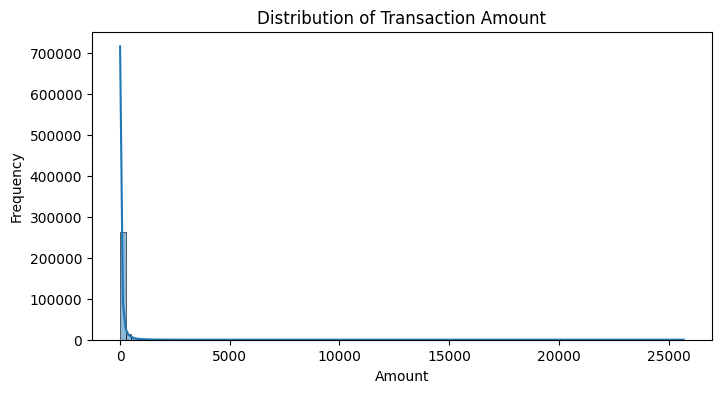

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


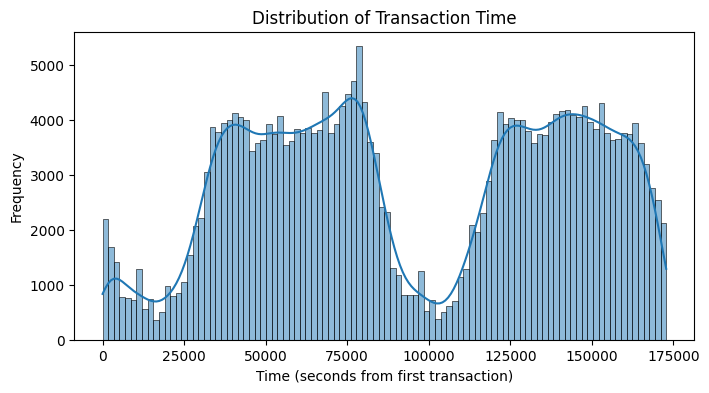

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution of 'Amount'
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# Check distribution of 'Time'
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Distribution of Transaction Time")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Frequency")
plt.show()


In [15]:
from sklearn.preprocessing import StandardScaler

# Copying the dataset
data = df.copy()

sc = StandardScaler()

# scaling Amount and Time
data[['Amount','Time']] = sc.fit_transform(data[['Amount','Time']])

# checking result
data[['Amount','Time']].head()

,Amount,Time
0,0.244964,-1.996583
1,-0.342475,-1.996583
2,1.160686,-1.996562
3,0.140534,-1.996562
4,-0.073403,-1.996541


In [17]:
from sklearn.model_selection import train_test_split

X = data.drop('Class',axis=1)
y = data['Class']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [21]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight = 'balanced',
    classes = np.unique(y_train),
    y = y_train
)

class_weights = dict(enumerate(class_weights))

In [38]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2,
                    epochs=75,
                    batch_size=2048,
                    class_weight=class_weights)


Epoch 1/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9926 - loss: 0.0148 - val_accuracy: 0.9971 - val_loss: 0.0161
Epoch 2/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9924 - loss: 0.0220 - val_accuracy: 0.9971 - val_loss: 0.0170
Epoch 3/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9927 - loss: 0.0165 - val_accuracy: 0.9976 - val_loss: 0.0148
Epoch 4/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9938 - loss: 0.0163 - val_accuracy: 0.9971 - val_loss: 0.0157
Epoch 5/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9931 - loss: 0.0186 - val_accuracy: 0.9974 - val_loss: 0.0160
Epoch 6/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9924 - loss: 0.0157 - val_accuracy: 0.9977 - val_loss: 0.0153
Epoch 7/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9931 - loss: 0.0238 - val_accuracy: 0.9977 - val_loss: 0.0149
Epoch 8/75
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9927 - loss: 0.0174 - val_accuracy: 0.9974 - val_loss:

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict(X_test)))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[[56707   157]
 [   12    86]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.88      0.50        98

    accuracy                           1.00     56962
   macro avg       0.68      0.94      0.75     56962
weighted avg       1.00      1.00      1.00     56962

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
ROC-AUC: 0.9751509688709474


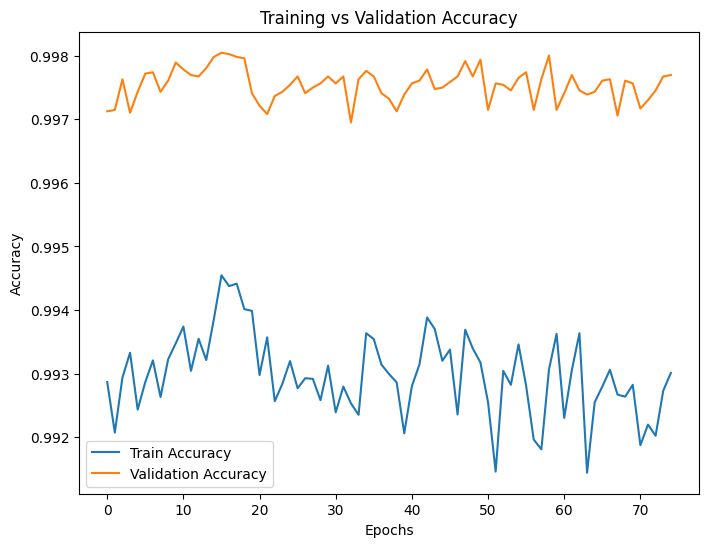

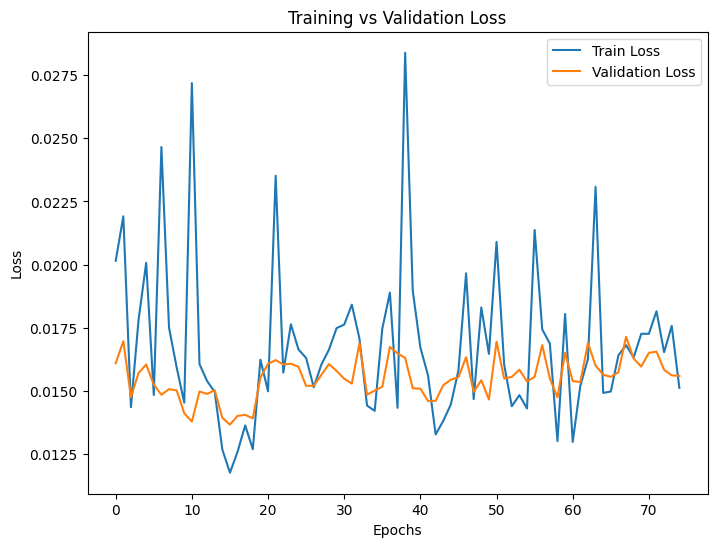

In [41]:
import matplotlib.pyplot as plt

# history is the object returned by model.fit()
# Example: history = model.fit(...)

# Plot Training vs Validation Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training vs Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [52]:
# Probabilities for the positive class (fraud = 1)
y_pred_proba = model.predict(X_test).ravel()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [53]:
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score

# y_test = true labels
# y_pred = predicted labels (0/1)
# y_pred_proba = predicted probabilities (for roc_auc)

roc_auc = roc_auc_score(y_test, y_pred_proba)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Final Model Summary:")
print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Fraud Recall: {recall:.2%}")
print(f"Accuracy: {accuracy:.2%}")

print("\nConclusion: The model effectively handles class imbalance and achieves high recall on fraud cases, making it suitable for real-world fraud detection systems.")


Final Model Summary:
ROC-AUC: 0.975
Fraud Recall: 87.76%
Accuracy: 99.70%

Conclusion: The model effectively handles class imbalance and achieves high recall on fraud cases, making it suitable for real-world fraud detection systems.
